# Part I (Prosper Loan Data Exploration)
## by Zao Richardson Ansah

## Introduction
> This aim of this Project is to explore a dataset containing loan information of approximately 113,937 loans. The dataset is the Prosper loan Dataset, provided by Udacity.


## Preliminary Wrangling


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

> Loading the dataset to describe its properties below. 

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.shape

(113937, 81)

In [3]:
#loading first 2 records
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
#showing info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Overall summary statistics of our data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of the dataset?
The dataset comprises of 113,937 loan records with 81 features. 

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the the insights related to the borrower information and the loan inforamtion. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are alot of features to explore to investigate the relationship between the borrowers and the loans they took.
###### Investigate the borrower information using these features; 
- MemberKey:The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
- EmploymentStatus:The employment status of the borrower at the time they posted the listing.
- Occupation:The Occupation selected by the Borrower at the time they created the listing.
- IncomeVerifiable:The borrower indicated they have the required documentation to support their income. 
- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
- IncomeRange: The income range of the borrower at the time the listing was created.
- BorrowerAPR:The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate:The Borrower's interest rate for this loan. 
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. 
- CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

###### Investigate Loan information using these features: 
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- LoanKey: Unique key for each loan. This is the same key that is used in the API. 
- LoanOriginalAmount: The origination amount of the loan.
- Term: The length of the loan expressed in months.
- LoanOriginationDate: The date the loan was originated.
- LoanOriginationQuarter: The quarter in which the loan was originated.
- TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

### Lets do some data cleaning

In [6]:
# Subset the dataframe by selecting features of interest
cols =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']


#Lets loop through the list of all the columns and remove the unwanted columns one by one
for i in df.columns:
    if i not in cols:
        df.pop(i)

In [7]:
#Checking the new columns
df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey',
       'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [8]:
#lets convert all the columns labels to 
df.columns = map(str.lower, df.columns)

In [9]:
#renaming the columns labels in the dataset
df.columns.values[:] = ['term', 'loan_status', 'borrower_apr', 'borrower_rate', 'borrower_state',
       'occupation', 'employment_status', 'is_borrower_homeowner',
       'credit_score_range_lower', 'credit_score_range_upper', 'debt_to_income_ratio',
       'income_range', 'income_verifiable', 'stated_monthly_income', 'loan_key',
       'total_prosper_loans', 'loan_original_amount', 'loan_origination_date',
       'loan_origination_quarter', 'member_key']

In [10]:
#Checking the renamed columns labels
df.columns

Index(['term', 'loan_status', 'borrower_apr', 'borrower_rate',
       'borrower_state', 'occupation', 'employment_status',
       'is_borrower_homeowner', 'credit_score_range_lower',
       'credit_score_range_upper', 'debt_to_income_ratio', 'income_range',
       'income_verifiable', 'stated_monthly_income', 'loan_key',
       'total_prosper_loans', 'loan_original_amount', 'loan_origination_date',
       'loan_origination_quarter', 'member_key'],
      dtype='object')

In [11]:
# We know that for the total_prosper_loans variable, those who have not taken a loan before are represented as NULL. So its not 
#like its missing data. Its just incorrect representation of data. So lets change these NULL values to Zero(0)

df['total_prosper_loans'] = df['total_prosper_loans'].fillna(0)

In [12]:
#The length of the loan expressed in months should be converted into an object format to prevent any operation from being 
#performed on them

df['term'] = df['term'].astype('object');

In [13]:
#Checking the number of duplicates in the data
sum(df.duplicated())

871

In [14]:
#Dropping the duplicates from the data
df.drop_duplicates(inplace =True)

In [15]:
# Recheck
sum(df.duplicated())

0

In [16]:
#Dropping all the rows with missing data
df.dropna(axis=0, inplace = True)

In [17]:
#Checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   term                      97022 non-null  object 
 1   loan_status               97022 non-null  object 
 2   borrower_apr              97022 non-null  float64
 3   borrower_rate             97022 non-null  float64
 4   borrower_state            97022 non-null  object 
 5   occupation                97022 non-null  object 
 6   employment_status         97022 non-null  object 
 7   is_borrower_homeowner     97022 non-null  bool   
 8   credit_score_range_lower  97022 non-null  float64
 9   credit_score_range_upper  97022 non-null  float64
 10  debt_to_income_ratio      97022 non-null  float64
 11  income_range              97022 non-null  object 
 12  income_verifiable         97022 non-null  bool   
 13  stated_monthly_income     97022 non-null  float64
 14  loan_

In [18]:
#Making a copy of the dataset to be used for the exploration Analysis
loan_data = df.copy()

In [19]:
#lets save this Dataset for later use
loan_data.to_csv('loan_data.csv', index=False)

## Univariate Exploration

> Investigating individual variables  

In [20]:
# Subset the dataframe by selecting features of interest
loan_data.head()

,term,loan_status,borrower_apr,borrower_rate,borrower_state,occupation,employment_status,is_borrower_homeowner,credit_score_range_lower,credit_score_range_upper,debt_to_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_key,total_prosper_loans,loan_original_amount,loan_origination_date,loan_origination_quarter,member_key
0,36,Completed,0.16516,0.1580,CO,Other,Self-employed,True,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0.0,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,36,Current,0.12016,0.0920,CO,Professional,Employed,False,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0.0,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,36,Completed,0.28269,0.2750,GA,Other,Not available,False,480.0,499.0,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0.0,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,36,Current,0.12528,0.0974,GA,Skilled Labor,Employed,True,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0.0,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,36,Current,0.24614,0.2085,MN,Executive,Employed,True,680.0,699.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C


In [21]:
# viewing the statistics
loan_data.describe()

,borrower_apr,borrower_rate,credit_score_range_lower,credit_score_range_upper,debt_to_income_ratio,stated_monthly_income,total_prosper_loans,loan_original_amount
count,97022.000000,97022.000000,97022.000000,97022.000000,97022.000000,97022.000000,97022.000000,97022.000000
mean,0.217906,0.191354,688.711632,707.711632,0.273533,5726.908025,0.287997,8633.707417
std,0.080303,0.074784,61.043410,61.043410,0.511870,4989.702473,0.665617,6368.804747
min,0.006530,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1000.000000
25%,0.155380,0.131400,660.000000,679.000000,0.150000,3333.333333,0.000000,4000.000000
50%,0.208080,0.181900,680.000000,699.000000,0.220000,4833.333333,0.000000,7000.000000
75%,0.282690,0.249900,720.000000,739.000000,0.320000,7000.000000,0.000000,12500.000000
max,0.423950,0.360000,880.000000,899.000000,10.010000,483333.333333,8.000000,35000.000000


In [22]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def titles(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL,size = 14)
    plt.ylabel(yL,size = 14)
color = sb.color_palette()[2];

In [23]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def tr(xL,title):
    plt.title(title)
    plt.xlabel(xL,size = 13)
color = sb.color_palette()[2] 

### Question 1 : What is the distribution of the borrower's demography accross top 10 states ?

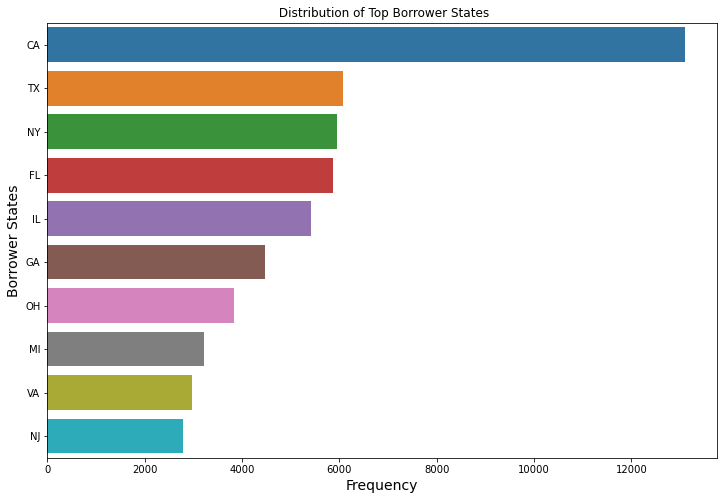

In [24]:
#looking at borrower's demography to see distribution across top 10 States 
plt.figure(figsize = [12, 8])


order = loan_data['borrower_state'].value_counts().iloc[:10].index
sb.countplot(data= loan_data, y= 'borrower_state', order = order)
titles("Frequency","Borrower States"," Distribution of Top Borrower States");

* Observation : The barchart reveals that California (CA) is the state with the highest number of borrowers

### Question 2: What is the employment ststus of Borrowers at the time of listing ?

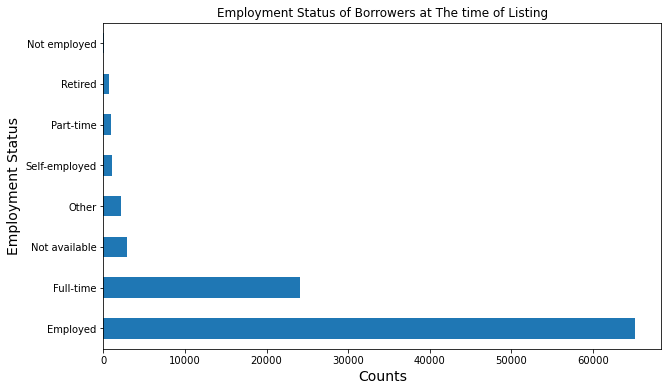

In [25]:
# Creating an horizontal barchart to show the distribution of the borrowers across the EmploymentStatus categories

plt.figure(figsize = [10, 6]) 

status = loan_data.employment_status.value_counts(ascending = False).head(10)

status.plot(kind ="barh")
titles("Counts","Employment Status","Employment Status of Borrowers at The time of Listing")

* Observation: It can be seen from the chart that about 60000+ borrowers were employed at the time posting thier listings

### Questio 3: What were the top 10 occupations of borrowers ? 

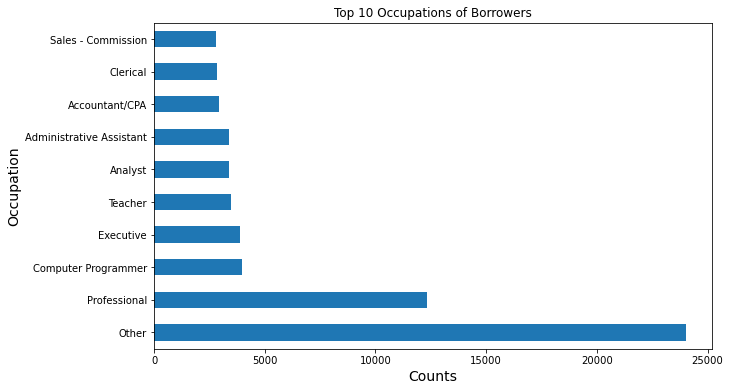

In [26]:
#Investigating the Top 10 Ocupation of Borrowers

plt.figure(figsize = [10, 6]) 

occup = loan_data.occupation.value_counts(ascending = False).head(10)

occup.plot(kind ="barh")
titles("Counts","Occupation","Top 10 Occupations of Borrowers")

* Observation :The chart reveals that the top occupation for borrowers is "other"

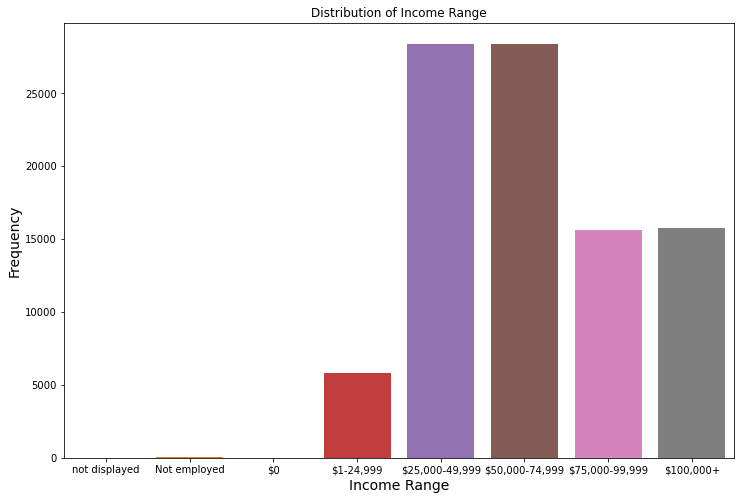

In [27]:
#checking their income ranges
# Creating a barchart to show the distribution of IncomeRange 
plt.figure(figsize = [12, 8])
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_data, x= 'income_range', order = order_type)
titles("Income Range","Frequency","Distribution of Income Range");

* Observation: Most of the borrowers have income between the range of ($)25,000-74,999


### Question 4: What was the stated motnhly income of the borrowers ?

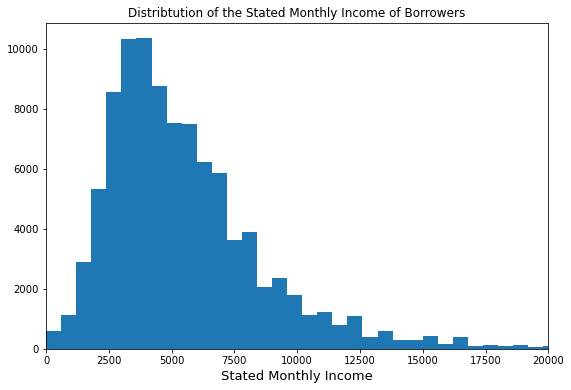

In [28]:
# creating an Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [9, 6])
bin= np.arange(0, loan_data['stated_monthly_income'].max()+600, 600)
plt.hist(data= loan_data, x = 'stated_monthly_income', bins= bin)
tr("Stated Monthly Income","Distribtution of the Stated Monthly Income of Borrowers")
plt.xlim(0, 20000);

* Observation : The stated monthly incomes of borrowers shows a right skewed distribution, with most montly salaries within the 2,500 and 5,000 range

### Question 5: How were the loans distributed ?

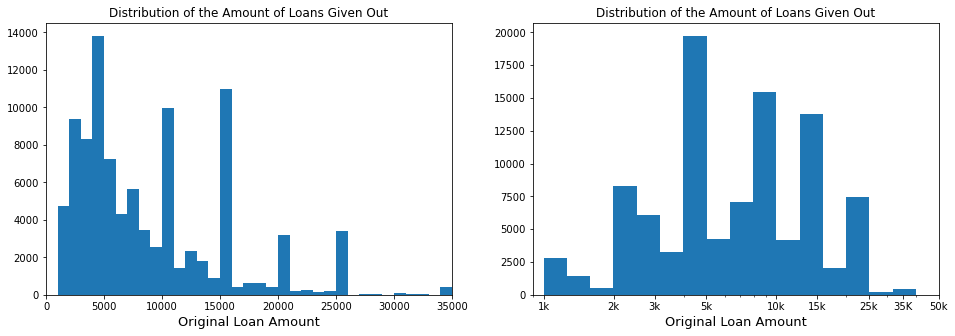

In [29]:
# creating an Histogram to show the distribution of the original loan amount
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)

bin= np.arange(0, loan_data['loan_original_amount'].max()+1000, 1000)
plt.hist(data= loan_data, x = 'loan_original_amount', bins= bin)
tr("Original Loan Amount","Distribution of the Amount of Loans Given Out")
plt.xlim(0, 35000)


# Applying a log transformation to the loan amount
plt.subplot(1, 2, 2)
log_binsize = 0.1
bins = 10 ** np.arange(3, np.log10(loan_data['loan_original_amount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_data, x = 'loan_original_amount', bins = bins)
tr("Original Loan Amount","Distribution of the Amount of Loans Given Out")
plt.xscale('log')
plt.xlim([900, 36000])
plt.xticks([1e3, 2e3, 3e3,5e3, 10e3,15e3, 25e3,35e3,50e3], ["1k", '2k','3k','5k', '10k', '15k', '25k','35K','50k'])
plt.show()


* Observation : The Loan Amounts in the dataset take on a very large range of values and is right skewed as can be seen in the left histogram. Plotted on a logarithmic scale, the distribution of Original Loan Amounts takes on a multimodal shape as can be seen in the right histogram

### Question 6: What is the distribution of the borrower's Debt to income ratio ?

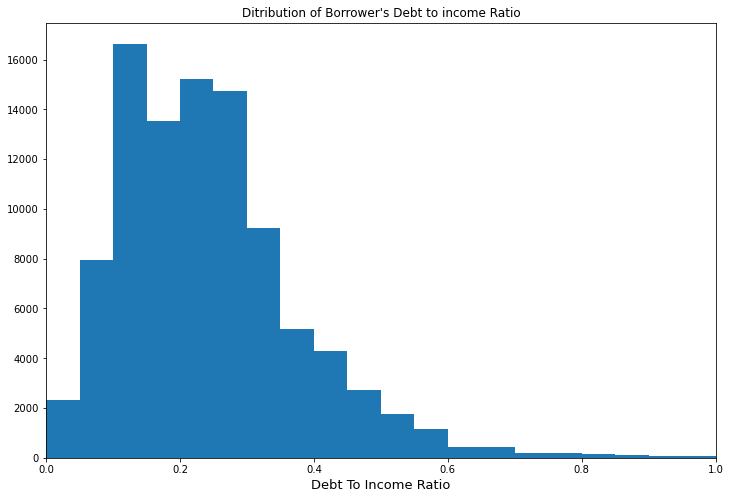

In [30]:
# creating an Histogram to show the distribution of the Borrower's DebtToIncomeRatio
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_data['debt_to_income_ratio'].max()+0.05, 0.05)
plt.hist(data= loan_data, x = 'debt_to_income_ratio', bins= bin)
plt.xlim(0, 1)
tr('Debt To Income Ratio', "Ditribution of Borrower's Debt to income Ratio");

* Debt to income ratio is skewed heavily to the right.

### Question 7: What is the distribution of the credit card score upper and lower range ?

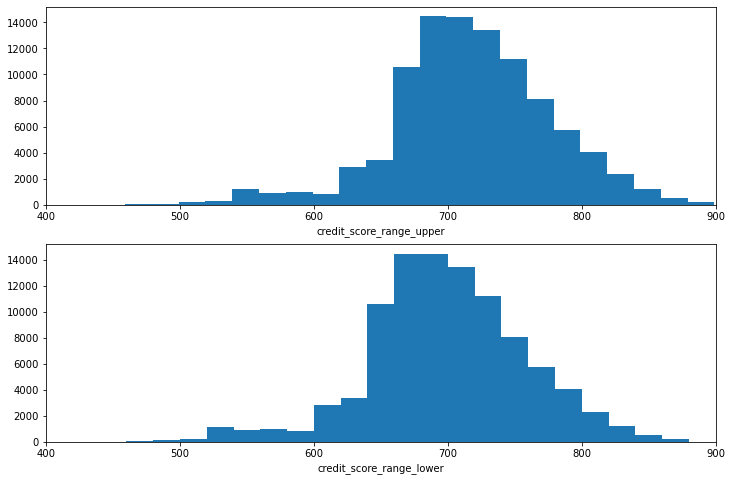

In [31]:
# using subplots, in creating Histograms to show the distribution of the Credit Score Upper and lower Range
fig, ax = plt.subplots(nrows=2, figsize = [12,8])
variables = ['credit_score_range_upper', 'credit_score_range_lower']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_data[var]), max(loan_data[var])+20, 20)
    ax[i].hist(data = loan_data, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_xlim(400, 900)

plt.show()


* Observation: credit_score_range_upper  has very similar distribution to credit_score_range_lower but 20 points higher.

### Question 8: What were the borrowers' Annual Percentage rates ?

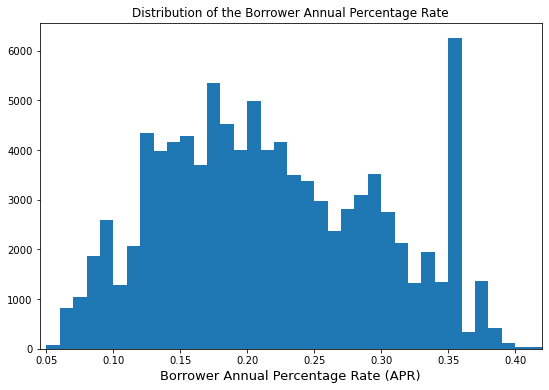

In [32]:
#Checking the distribution of the Borrower's Annual Percentage Rate (APR) for the loan.
plt.figure(figsize = [9, 6]) 

bins = np.arange(0.04, loan_data['borrower_apr'].max()+0.01, 0.01)
plt.hist(loan_data['borrower_apr'], bins = bins);
tr("Borrower Annual Percentage Rate (APR)","Distribution of the Borrower Annual Percentage Rate")
plt.xlim(0.045, 0.42);

* Observation : The histogram of the borrower's APR reveals a distribution with different small peaks but one notable and tallest peak occuring at a Borrowers APR of 0.35 , this is the most common or typical Borrowers APR

### Question 9: What were the current loan statuses given by prosper loans ?

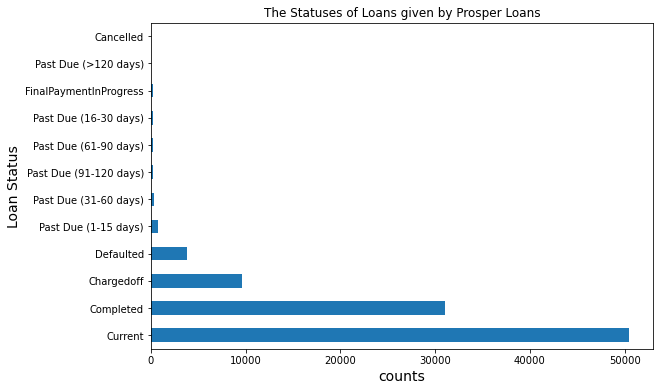

In [33]:
#Investigating the current statuses of loans given by Prosper Loans
plt.figure(figsize = [9, 6]) 

status = loan_data.loan_status.value_counts(ascending = False)

status.plot(kind ="barh")
titles("counts","Loan Status","The Statuses of Loans given by Prosper Loans")

* Observation : The chart reveals that the current loan status is the highest amongst all the other loan statutes. Which means majority of the borrowers are making payments on time

### Question 10 : What were the common loan terms expressed in months ?

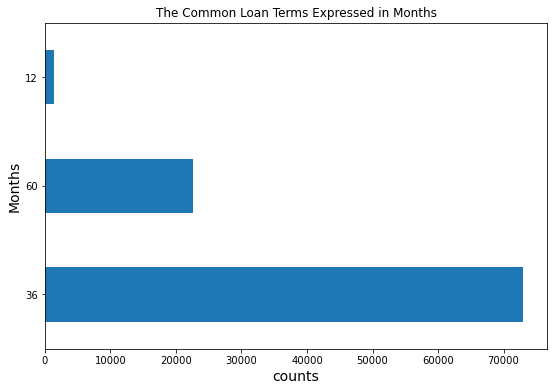

In [34]:
#creating bar chart to show the loan terms distribution
#Checking for the most common loan term expressed in months

plt.figure(figsize = [9, 6]) 
a = loan_data.term.value_counts(ascending = False)
a.plot(kind ="barh")
titles("counts","Months","The Common Loan Terms Expressed in Months")

* Observation : The common loan term preferred by borrowers is 36-months

### Question 11: What was the distribution of loans taken in various years ?

In [35]:
# creating month and year columns from LoanOriginationDate
loan_data['month']= pd.DatetimeIndex(loan_data['loan_origination_date']).month
loan_data['year']= pd.DatetimeIndex(loan_data['loan_origination_date']).year

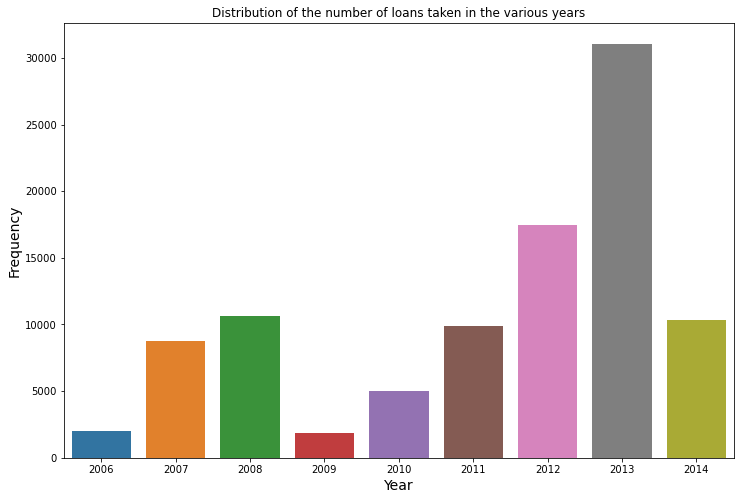

In [36]:
#creating bar chart to show the years distribution 
plt.figure(figsize = [12, 8])
sb.countplot(data= loan_data, x= 'year')
titles("Year", "Frequency", "Distribution of the number of loans taken in the various years");

* Observation: Majority of the loans were taken in 2013

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

To summarize our variables of interest,I took a look at the distribution of the Original Loan Amounts and discovered that the loan amounts take on a very large range of values and is heavily right skewed. After the distribution was plotted on a logarithmic scale, the distribution of original loan amounts on the Logarithimic scale took on a multimodal shape, I also took a look at the borrower's state and discovered CA has the highest borrowers. The histogram of the borrower's APR and Interest rate reveals a distribution with different small peaks but one notable and tallest peak occuring at a Borrowers APR and Borrower Interest rate of 0.35 respectively. The most common loan term preferred by borrowers is 36-months. I looked at the borrower's employment status and discovered majority of them are employed and fulltime. Their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed. The credit score range lower and upper are 20 points different.
 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I extracted the months and years of the loans from the loan original date  this was to help me diacover the year that had the highest number of loans taken, it turned out to be the year 2013.

## Bivariate Exploration
Investigated the relationships between pairs of variables of interest in the data.

In [37]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   term                      97022 non-null  object 
 1   loan_status               97022 non-null  object 
 2   borrower_apr              97022 non-null  float64
 3   borrower_rate             97022 non-null  float64
 4   borrower_state            97022 non-null  object 
 5   occupation                97022 non-null  object 
 6   employment_status         97022 non-null  object 
 7   is_borrower_homeowner     97022 non-null  bool   
 8   credit_score_range_lower  97022 non-null  float64
 9   credit_score_range_upper  97022 non-null  float64
 10  debt_to_income_ratio      97022 non-null  float64
 11  income_range              97022 non-null  object 
 12  income_verifiable         97022 non-null  bool   
 13  stated_monthly_income     97022 non-null  float64
 14  loan_

### Question 1: What is the correlation between 'loan_original_amount', 'stated_monthly_income' and 'borrower_rate' 

In [38]:
#changing term, month and year to object
loan_data['term']=loan_data['term'].astype(object)
loan_data['month']=loan_data['month'].astype(object)
loan_data['year']=loan_data['year'].astype(object)

In [39]:
# numeric and categorical variables
numeric_vars = [ 'loan_original_amount', 'stated_monthly_income', 'borrower_rate']
categoric_vars = ['income_range', 'employment_status', 'term', 'year', 'is_borrower_homeowner']

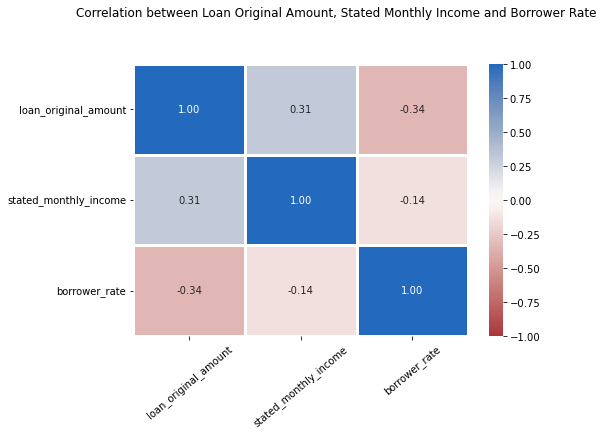

In [49]:
# Visualize the correlations  with a heatmap
plt.figure(figsize= (7.5, 5))
sb.heatmap(data=loan_data[numeric_vars].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.suptitle("Correlation between Loan Original Amount, Stated Monthly Income and Borrower Rate", y = 1.04)
plt.xticks(rotation=40);


* The correlation between stated_monthly_income and loan_original_amount is 0.31 
* The correlation between stated_monthly income and borrower_rate is -0.14
* The correlation between loan_original_amount and borrower_rate is - 0.34

Slightly positive correlation between stated_monthly_income and loan_original_amount, where as a negative correlation between stated_monthly income and borrower_rate and loan_original_amount and borrower_rate


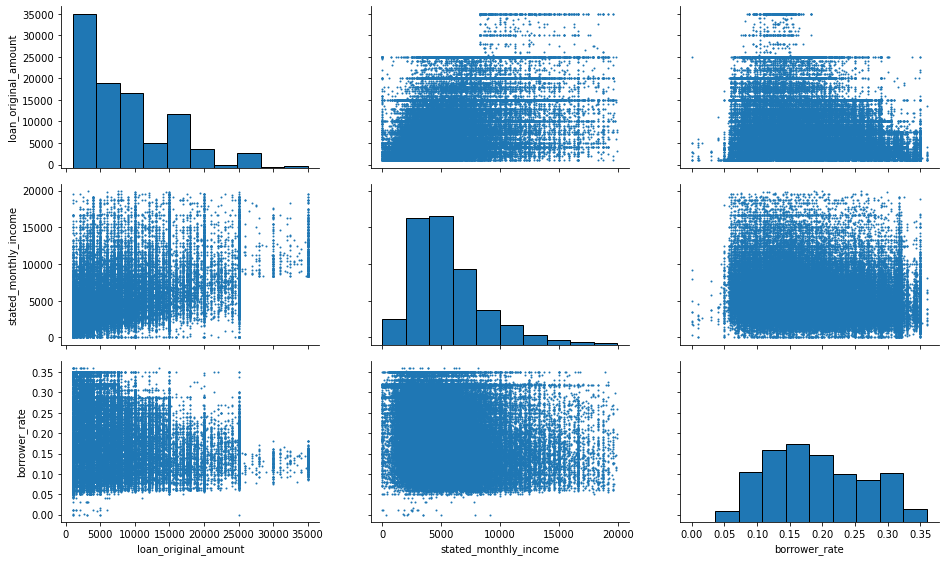

In [41]:
# plot matrix to make it clearer and they render faster

g = sb.PairGrid(data = loan_data.query('stated_monthly_income<stated_monthly_income.quantile(0.99)'), vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10, edgecolor = 'black');
g.map_offdiag(plt.scatter , s = 1);
                
g.fig.set_size_inches(14,8)

* The loan_original_amount is positively correlated with the stated_monthly_income.


### Question 2: What is the relationship between Employment status and the numerical variables: 'loan_original_amount', 'stated_monthly_income', 'borrower_rate'?

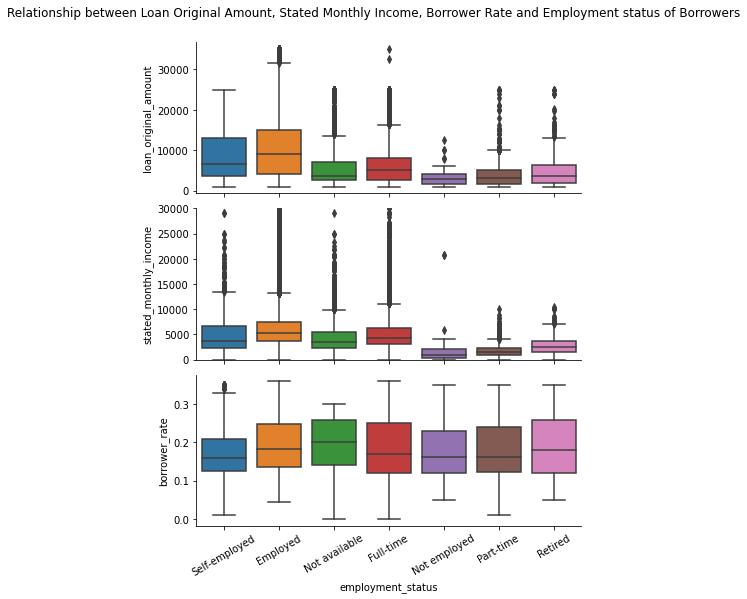

In [42]:
employment_filter = loan_data.query('employment_status != "Other"')

fig = sb.PairGrid(data=employment_filter, y_vars=numeric_vars, x_vars='employment_status', aspect=2.5)
fig.map(sb.boxplot)

# Setting the y axis of StatedMonthlyIncome to 0 - 30000
fig.axes[1][0].set_ylim(0, 30000)
plt.suptitle("Relationship between Loan Original Amount, Stated Monthly Income, Borrower Rate and Employment status of Borrowers", y = 1.04);
plt.xticks(rotation=30);

* Observation: The employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than the part-time, retired, and unemployed borrowers. Borrower rate is slightly lower in Self employed, full-time, unemployed and part -time borrowers.

### Question 3: What is relationship between borrowers loan original amount and their verifiable income status

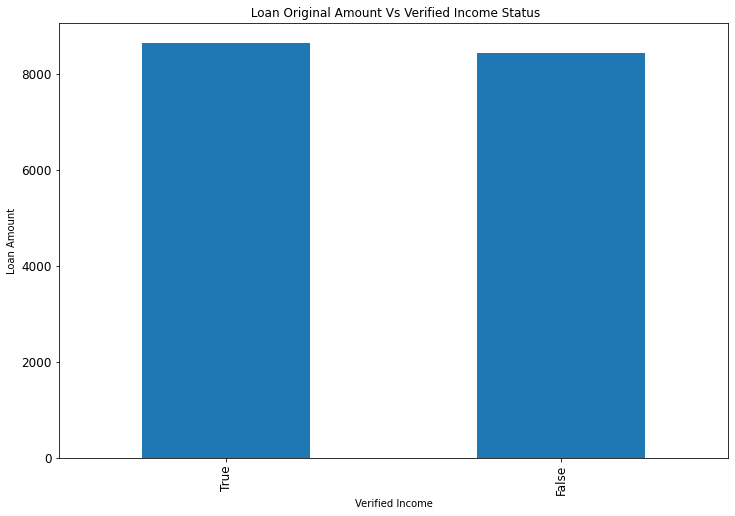

In [43]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= loan_data.groupby('income_verifiable')['loan_original_amount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title(' Loan Original Amount Vs Verified Income Status');

* Observation: Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income.

### Question 4: How  does borrower_rate, stated_monthly_income and loan_original_amount correlate with the categorical variables.

In [44]:
loan_data_samp = loan_data.sample(n = 500, replace = False)

<Figure size 864x576 with 0 Axes>

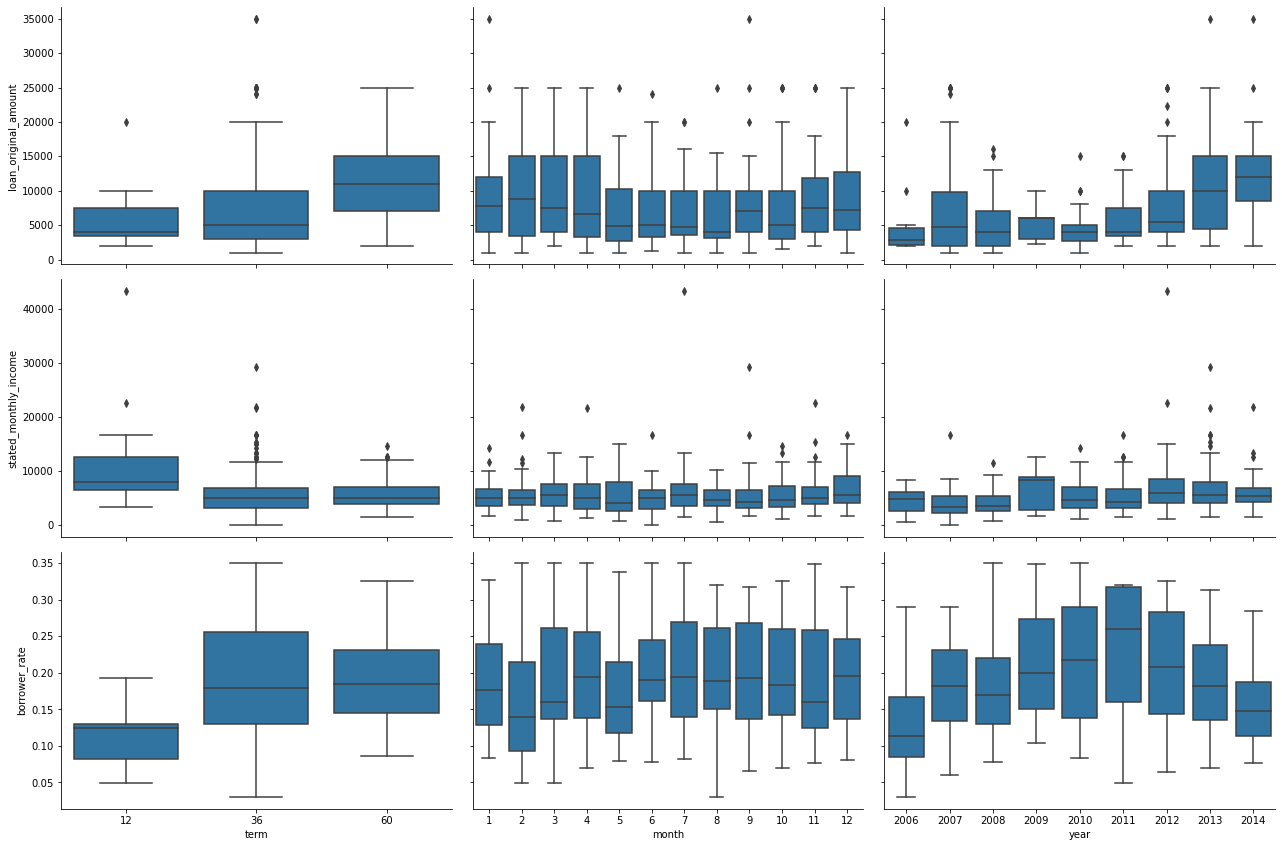

In [45]:
#plotting matrix of numeric features against categorical features.
categorical_vars = ['term', 'month','year']

#def boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = loan_data_samp, y_vars = numeric_vars, x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid);

**Observtions**

* A strong positive relationship between term and loan amount (longer the term, the larger the loan)
* There was a large dip in loan origination in 2008-2009 and then went back up in 2013.

### Question 5: What is the relationship between income range and if the borrower is a home owner and then the employment status and the term ?

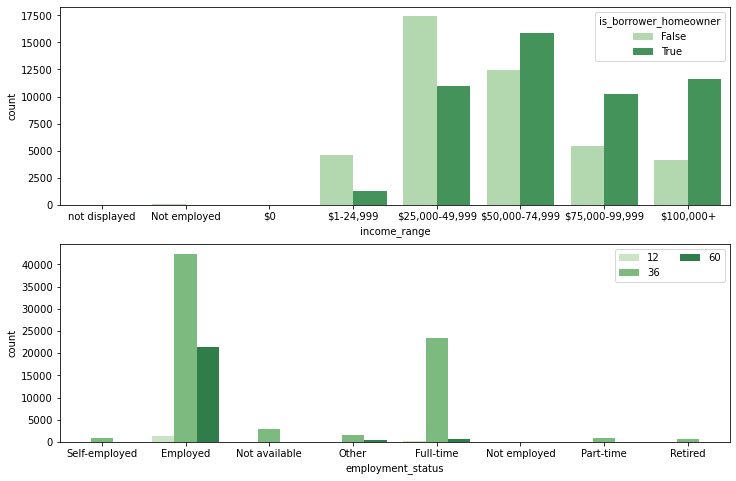

In [46]:
plt.figure(figsize = [12, 8])
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']

# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sb.countplot(data = loan_data, x = 'income_range', hue = 'is_borrower_homeowner', order=order, palette = 'Greens')

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan_data, x = 'employment_status', hue = 'term', palette = 'Greens')

ax.legend(loc = 1, ncol = 2); 


**Observations**

* Homeowners make up the majority of borrowers with income ranging from  $50,000,000 - 100,000+
* Those with full-time jobs typically seek loans with a 12-month term.
* Employed borrowers typically accept loans with terms of 36 months.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The original loan amount's correlation to the borrower interest rate is inverse, meaning that the higher the loan amount, the lower the borrower rate will be. Additionally, it demonstrates that while the range of interest rates is broad for different loan amounts, it narrows as loan amounts rise. The original loan amount and the stated monthly income have a favorable correlation. In other words, the loan amount borrowed will be larger the higher their stated monthly income. The average loan amount for borrowers with verified income is typically larger than that for borrowers without verified income. On average, borrowers who work full-time and are employed take out greater loans than other categories. Finally, we observed that the employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than the part-time, retired, and unemployed borrowers. Borrower rate is slightly lower in Self employed, full-time, unemployed and part -time borrowers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners
* Borrowers with full time employment status tend to take loans with term duration of 12months
* Employed borrowers tend to take loans of term duration as 36months
* There is a strong positive relationship between term and loan amount (longer the term, the larger the loan)
* I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

## Multivariate Exploration
Creating plots of three or more variables to investigate the data even further. 

### Question 1:  Does term have effect on relationship of borrower_rate and loan_original_amount

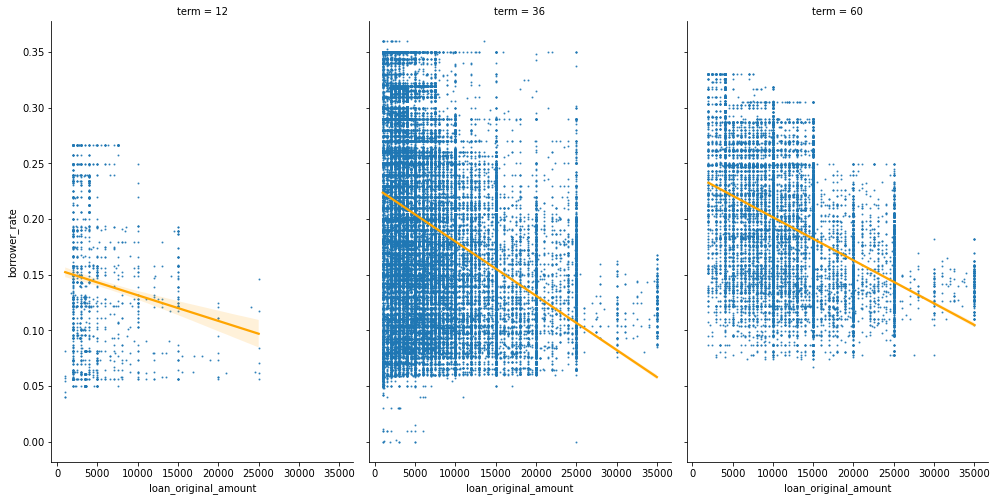

In [47]:
t=sb.FacetGrid(data=loan_data, aspect=1.2, height=4, col='term', col_wrap=3)
t.map(sb.regplot, 'loan_original_amount', 'borrower_rate', scatter_kws={'s':1}, line_kws={'color':'orange'});
t.add_legend();
t.fig.set_size_inches(14,8);

Interestingly, term does not seem to have effect on the relationship between borrower_rate and loan_original_amount

### Question 3: Does a  verified income have effect on the relationship between loan_original_amount and income_range ?

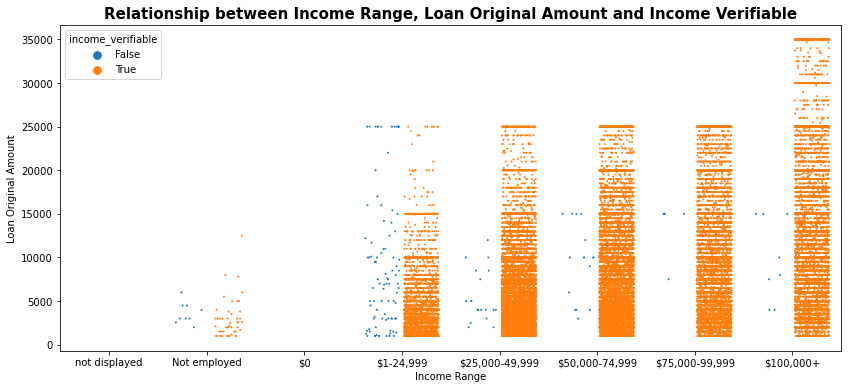

In [48]:
plt.figure(figsize = (14,6))
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.stripplot(data= loan_data, x= 'income_range', y ='loan_original_amount', hue = 'income_verifiable', 
           order = order, size = 2, jitter= 0.35, dodge = True)
plt.title('Relationship between Income Range, Loan Original Amount and Income Verifiable', fontsize= 15, fontweight = 'bold')
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.show()

* People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Term does'nt really seem to have effect on the relationship between borrower rate and loan original amount

### Were there any interesting or surprising interactions between features?

* People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts

## Conclusions

For this exploratory analysis, my main interest was to analyze the borrowers information for relationship insights with the loans they took. 

**Univariate Exploration**

* CA State has the highest borrowers.

* I discovered majority of the borrowers have either employed or fulltime employment

* I discovered that their income mostly ranges from 25,000-74,999 and their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed as well. 

* The borrower's APR reveals a distribution with different small peaks but one notable and tallest peak occuring at a Borrowers APR of 0.35 , this is the most common or typical Borrowers APR

* Looking at the loan terms, they were either for a period of 12, 36 or 60 months. Most of the loans have a loan term of 36 months.

* I discovered alot of loans were taken in 2013 and worth investigating further.

* Majority of the borrowers are making payments on time per the current loan status


**Bivariate Exploration**

* I discovered that the borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. 

* I discovered that the loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. 

* Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. 

* Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners.

* The employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than the part-time, retired, and unemployed borrowers. Borrower rate is slightly lower in Self employed, full-time, unemployed and part -time borrowers.

* There is a strong positive relationship between term and loan amount (longer the term, the larger the loan).

* Employed borrowers tend to take loans of term duration as 36months while Borrowers with full time employment status tend to take loans with term duration of 12months.

* I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

**Multivariate Exploration**

* Loan term did'nt really seem to have effect on the relationship between borrower rate and loan original amount.

* I discovered that People who earn ($)100,000+ and have verified their income tend to get larger loan original


### Limitations

* There were some missing values in some columns which could have messed with the accuracy of the analysis.

* Another challenge was selecting what features of interest to focus on since the dataset had 81 features.
